In [ ]:
!nvidia-smi

Fri Jan  3 11:34:02 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=predict

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING ⚠️ 'model' argument is missing. Using default 'model=yolo11n.pt'.
100% 5.35M/5.35M [00:00<00:00, 67.6MB/s]
WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 47.5ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 65.5ms
Speed: 6.6ms preprocess, 56.5ms inference, 364.9ms postproc

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fi1iV9VYnfIajjl54hSV")
project = rf.workspace("hammads-flow").project("pakistan-sign-language-translator-2")
version = project.version(9)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pakistan-sign-language-translator-2-9 in yolov8:: 100%|██████████| 13168/13168 [00:02<00:00, 4409.11it/s]


In [ ]:
# /content/runs/detect/train/args.yaml
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/Pakistan-sign-language-translator-2-9/data.yaml epochs=25 imgsz=800

/content
100% 6.25M/6.25M [00:00<00:00, 82.7MB/s]
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Pakistan-sign-language-translator-2-9/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1735714218.e90ea16d2269.1298.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4965.jpg  weights
P_curve.png					    train_batch4966.jpg
PR_curve.png					    train_batch4967.jpg


/content


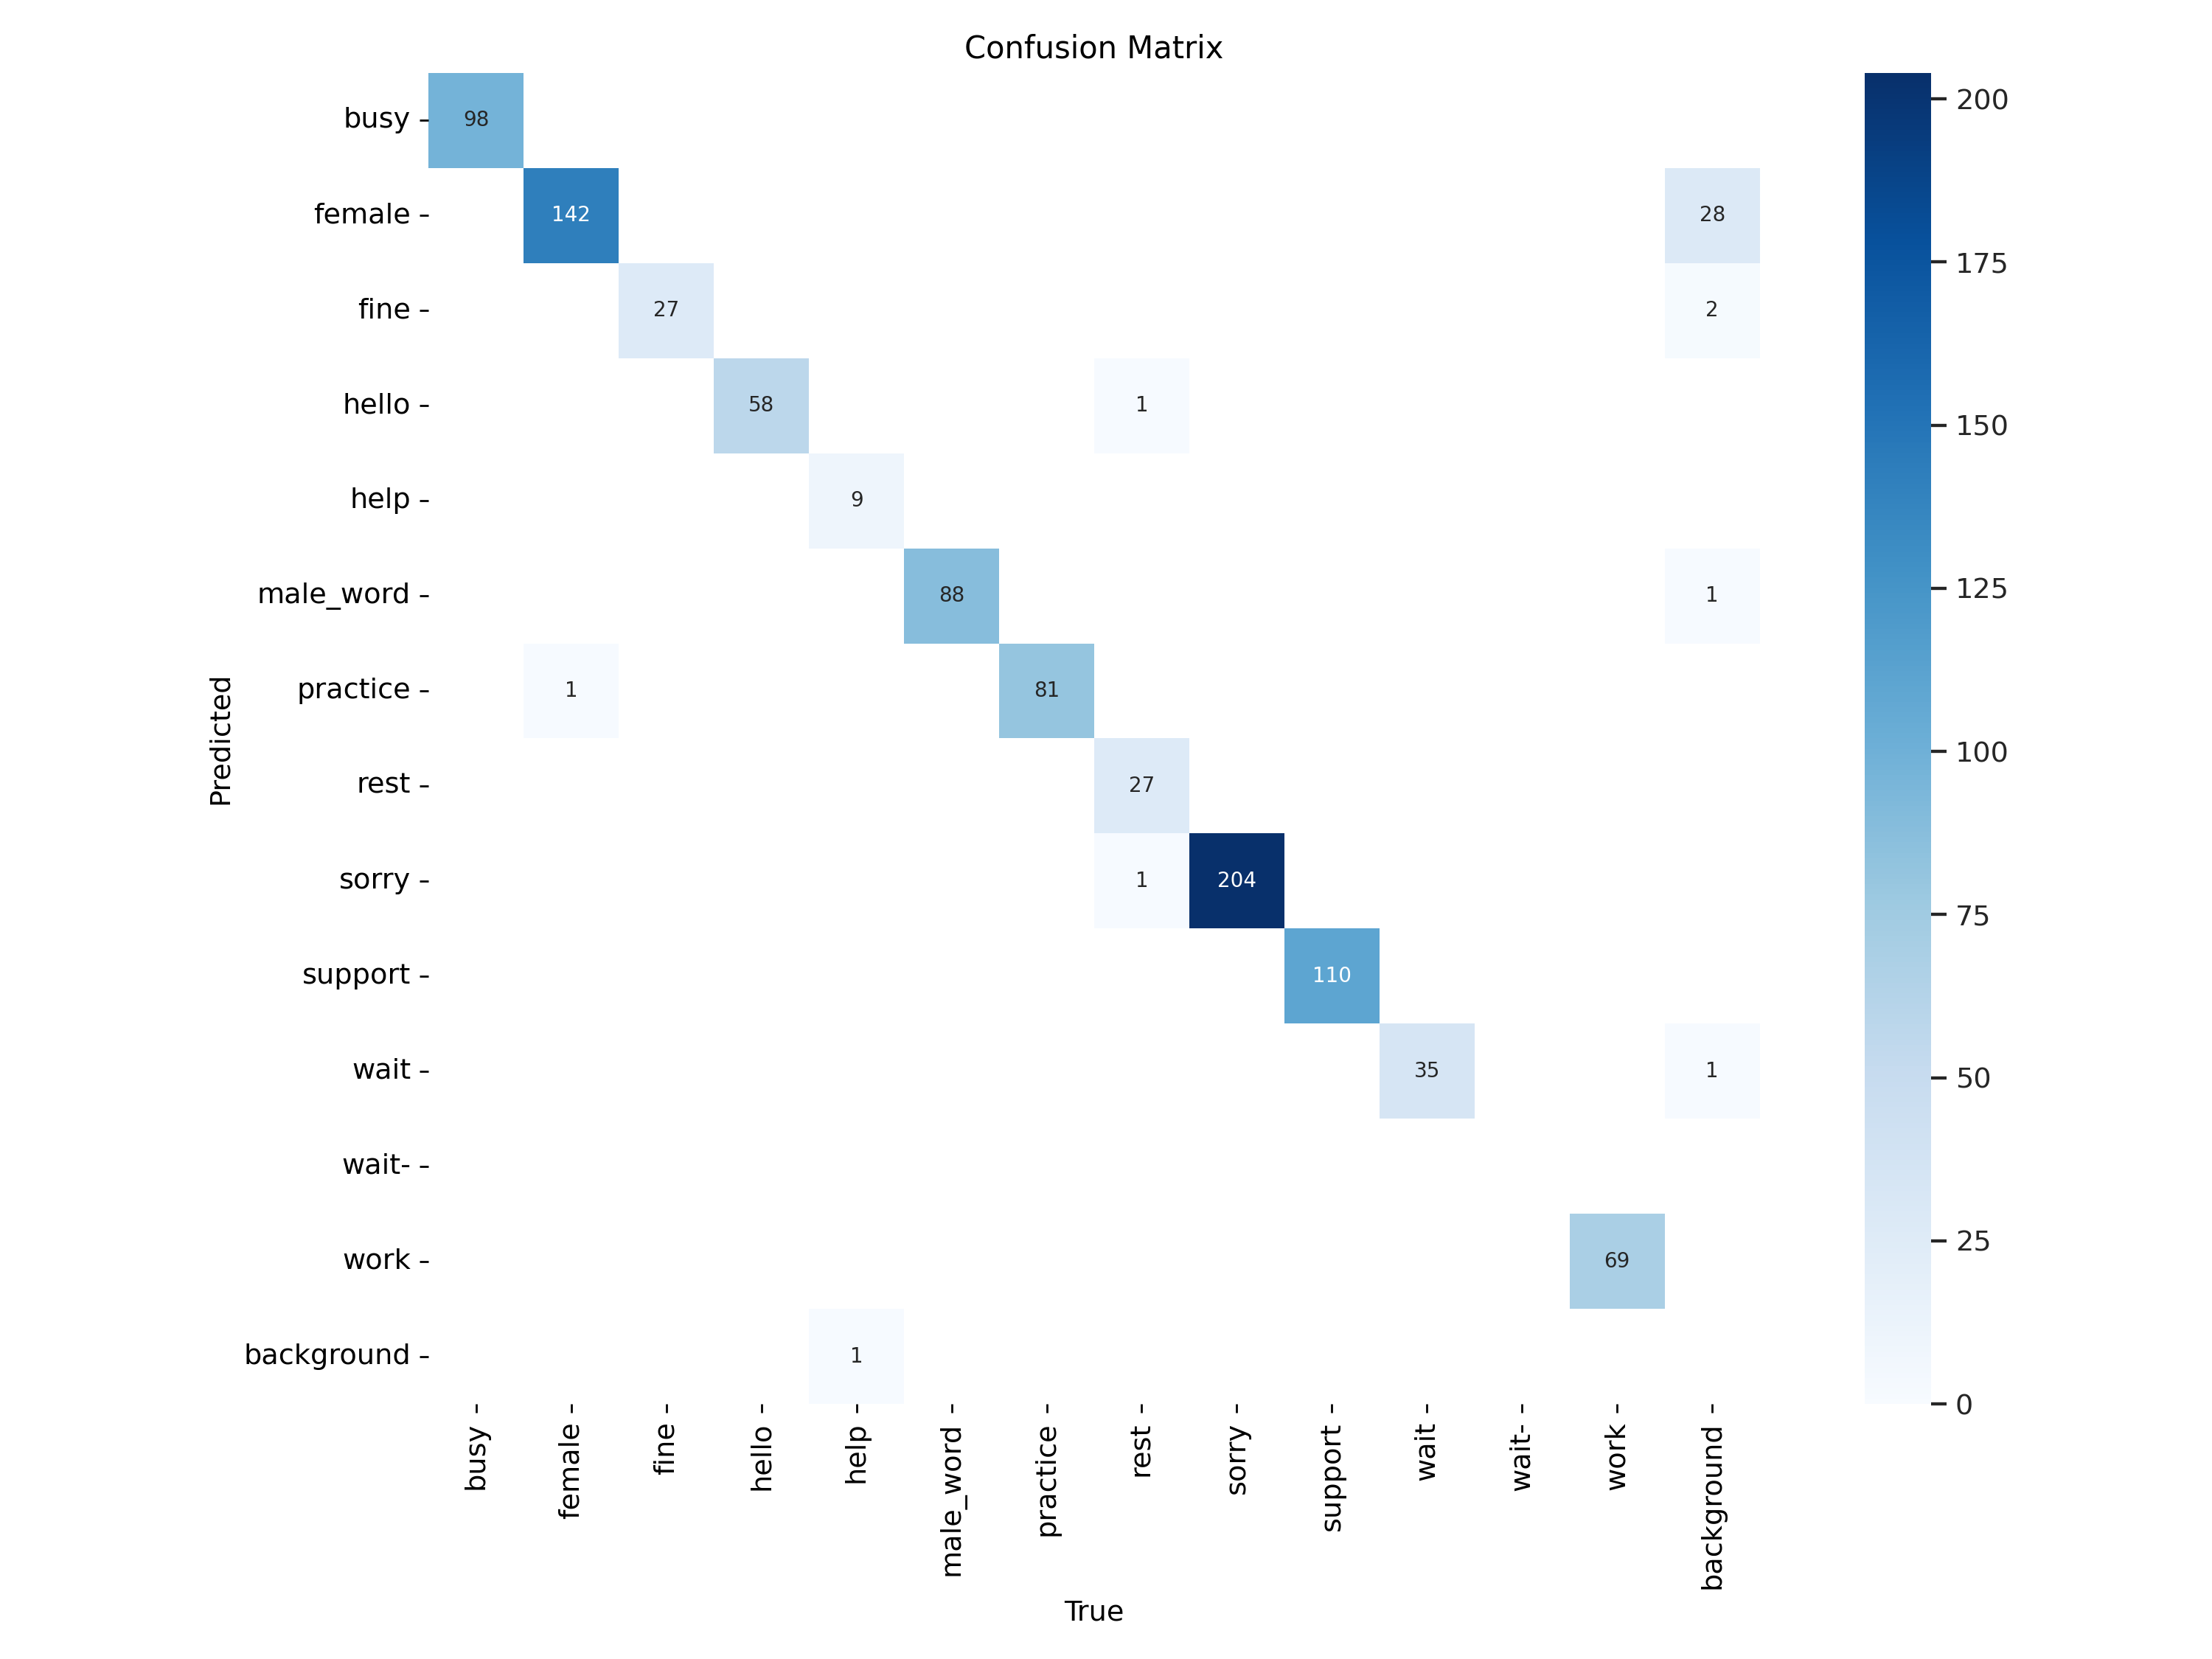

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=600)

/content


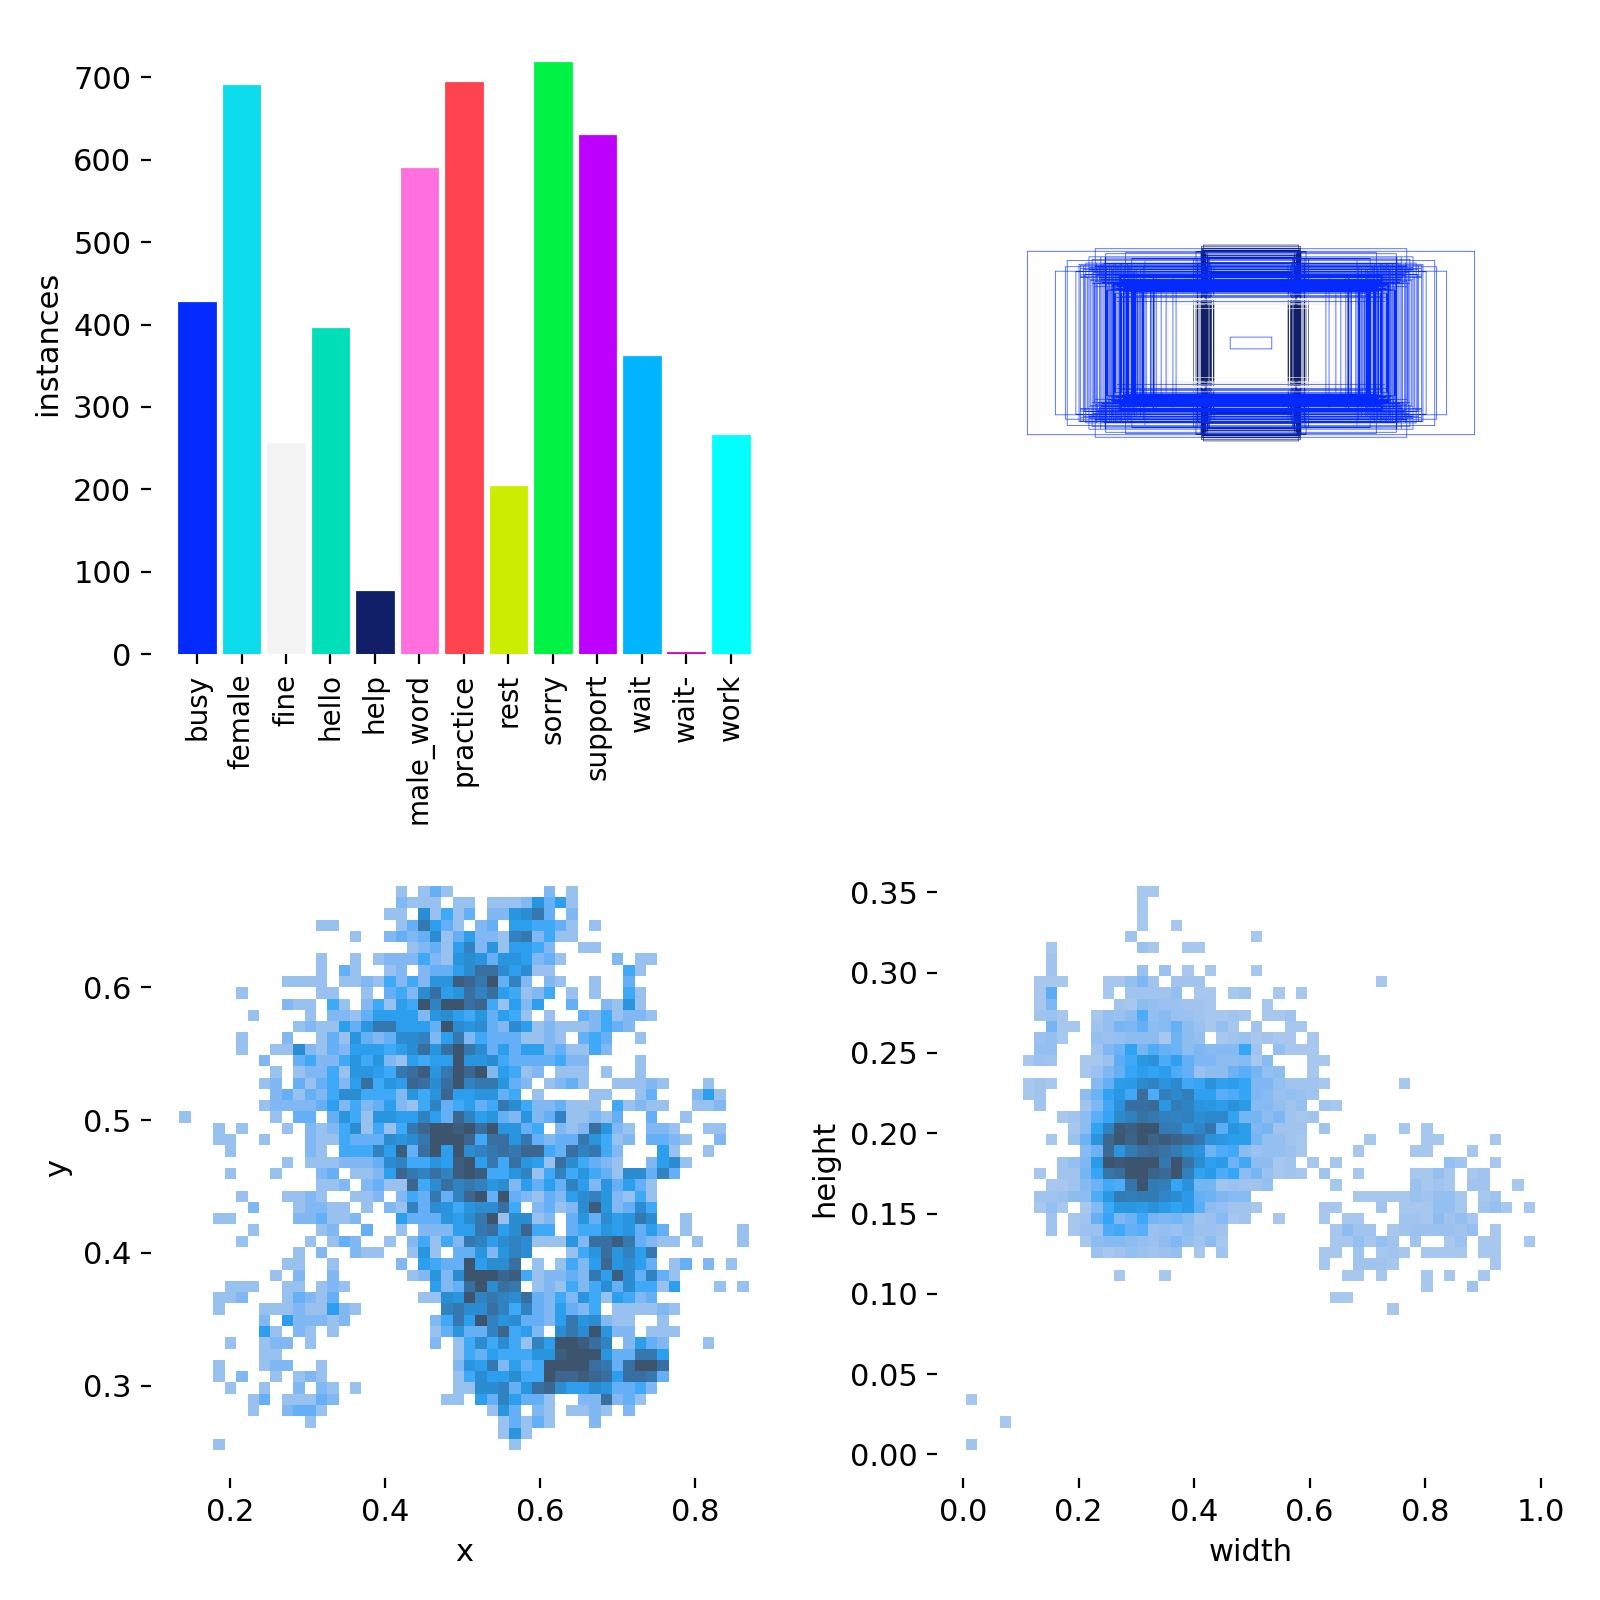

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels.jpg',width=600)

/content


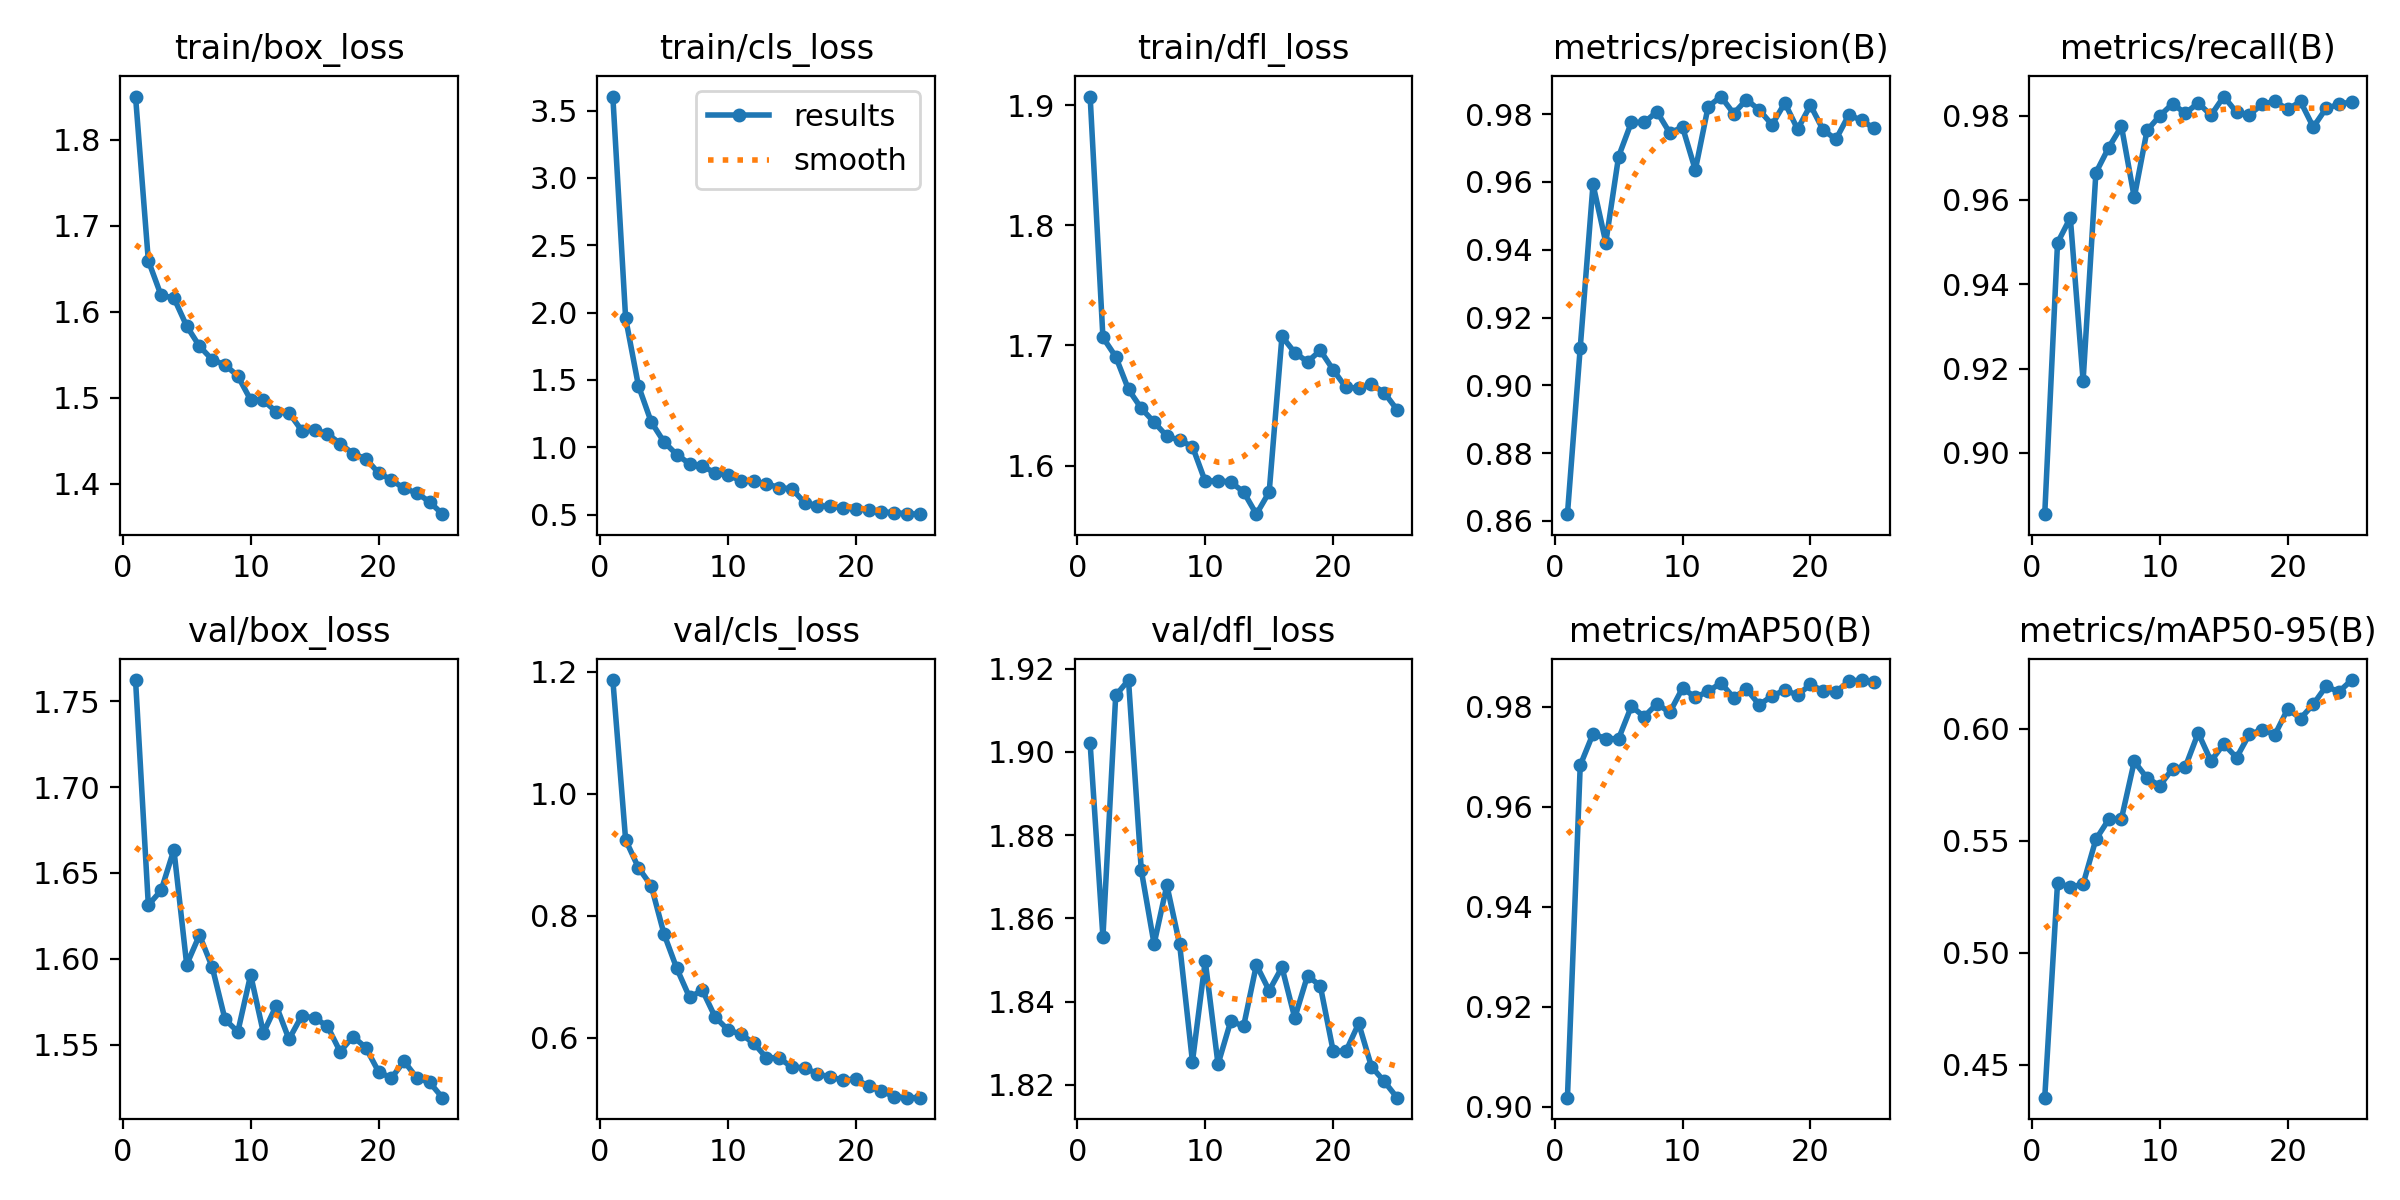

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png',width=600)

/bin/bash: line 1: torch: command not found


In [ ]:

%cd {HOME}
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source=/content/Pakistan-sign-language-translator-2-9/test/images

/content
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs

image 1/334 /content/Pakistan-sign-language-translator-2-9/test/images/144_png.rf.b94f3f78f4e4fb1527997e813c45aa87.jpg: 800x448 1 fine, 44.0ms
image 2/334 /content/Pakistan-sign-language-translator-2-9/test/images/146_png.rf.bd41185854bf63c0ca1e949c3e04ac7d.jpg: 800x448 1 fine, 7.5ms
image 3/334 /content/Pakistan-sign-language-translator-2-9/test/images/255_png.rf.4147498a79bab9c1df6e3a0bd49eb787.jpg: 800x448 1 fine, 7.2ms
image 4/334 /content/Pakistan-sign-language-translator-2-9/test/images/26_png.rf.280a7eba8e523362975d60b7fdaee89b.jpg: 480x800 1 help, 36.8ms
image 5/334 /content/Pakistan-sign-language-translator-2-9/test/images/28-3-_png.rf.62c76be61eea9e9d2221c8d8c067173c.jpg: 480x800 1 help, 7.4ms
image 6/334 /content/Pakistan-sign-language-translator-2-9/test/images/30-2-_png.rf.60370185c0c126199f40989e1a9f38

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/best.pt data=/content/Pakistan-sign-language-translator-2-9/data.yaml


/content
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 24.8MB/s]
val: Scanning /content/Pakistan-sign-language-translator-2-9/valid/labels... 951 images, 0 backgrounds, 0 corrupt: 100% 951/951 [00:00<00:00, 1632.44it/s]
val: New cache created: /content/Pakistan-sign-language-translator-2-9/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 60/60 [00:14<00:00,  4.25it/s]
                   all        951        952      0.976      0.983      0.985      0.622
                  busy         98         98      0.994          1      0.995      0.539
                female        143        143      0.952      0.976      0.992      0.511
                  fine         27         27      0.952          1      0.995      0.517
                 hello         58         58      0.976       